In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import s3fs
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import matplotlib.path as mpath
from read_pangeo import read_pangeo, read_to_detect
from importcmip import aod245, aodh, aod585, read_370


In [ ]:
#load and merge data
arh = xr.open_dataset('historical20002014_AR_detection.nc')
ar245 = xr.open_dataset('ssp24520852100_AR_detection.nc')
ar370 = xr.open_dataset('ssp37020852099_AR_detection.nc')
ar585 = xr.open_dataset('ssp58520852100_AR_detection.nc')

cmh = read_pangeo(2000, 2014, 'historical')
dh = cmh.merge(aodh.drop(['lat_bnds', 'time_bnds', 'lon_bnds']))

cm245 = read_pangeo(2085, 2099, 'ssp245')
d245= cm245.merge(aod245)

cm370 = read_pangeo(2085, 2099, 'ssp370')
cm370b = read_370()
d370 = cm370.merge(cm370b.drop(('lat_bnds', 'time_bnds', 'lon_bnds')))


cm585 = read_pangeo(2085, 2099, 'ssp585')
d585 = cm585.merge(aod585.drop(('lat_bnds', 'time_bnds', 'lon_bnds')))

In [51]:
'''n245 = d245.sel(lat = slice(50,90),plev=slice(100000, 25000))
masked_n245 = n245.where(ar245['ivt']==True)
neg_n245 = n245.where(ar245['ivt']==False)
na245 = masked_n245['od550aer'].values.flatten() 
na245 = na245[~np.isnan(na245)]'''

In [ ]:
# slice to poles and only until pressure levels where AR can be detected
n245 = d245.sel(lat = slice(50,90),plev=slice(100000, 25000))
s245 =d245.sel(lat = slice(-90,-50),plev=slice(100000, 25000))

n370 = d370.sel(lat = slice(50,90),plev=slice(100000, 25000))
s370 =d370.sel(lat = slice(-90,-50),plev=slice(100000, 25000))

n585 = d585.sel(lat = slice(50,90),plev=slice(100000, 25000))
s585 =d585.sel(lat = slice(-90,-50),plev=slice(100000, 25000))

nh = dh.sel(lat = slice(50,90), plev=slice(100000, 25000))
sh =dh.sel(lat = slice(-90,-50), plev=slice(100000, 25000))


# mask data for being inside or outside of a atmospheric river
# arctic
masked_n245 = n245.where(ar245['ivt']==True)
masked_n370 = n370.where(ar370['ivt']==True)
masked_n585 = n585.where(ar585['ivt']==True)
masked_nh = nh.where(arh['ivt']==True)

neg_n245 = n245.where(ar245['ivt']==False)
neg_n370 = n370.where(ar370['ivt']==False)
neg_n585 = n585.where(ar585['ivt']==False)
neg_nh = nh.where(arh['ivt']==False)

# antarctic
masked_s245 = s245.where(ar245['ivt']==True)
masked_s370 = s370.where(ar370['ivt']==True)
masked_s585 = s585.where(ar585['ivt']==True)
masked_sh = sh.where(arh['ivt']==True)

neg_s245 = s245.where(ar245['ivt']==False)
neg_s370 = s370.where(ar370['ivt']==False)
neg_s585 = s585.where(ar585['ivt']==False)
neg_sh = sh.where(arh['ivt']==False)

In [5]:
#treat variables for plotting
#integrate needed humidity
int_nh245 =-1*masked_n245['hus'].integrate('plev')
int_sh245 =-1*masked_s245['hus'].integrate('plev')
int_nh370 =-1*masked_n370['hus'].integrate('plev')
int_sh370 =-1*masked_s370['hus'].integrate('plev')
int_nh585 =-1*masked_n585['hus'].integrate('plev')
int_sh585 =-1*masked_s585['hus'].integrate('plev')
int_nhh =-1*masked_nh['hus'].integrate('plev')
int_shh =-1*masked_sh['hus'].integrate('plev')

# for plotting with matplotlib: flatten db to array 
int_nh245 = int_nh245.values.flatten() 
int_sh245 = int_sh245.values.flatten()
int_nh370 = int_nh370.values.flatten()
int_sh370 = int_sh370.values.flatten()
int_nh585 = int_nh585.values.flatten()
int_sh585 = int_sh585.values.flatten()
int_nhh = int_nhh.values.flatten()
int_shh = int_shh.values.flatten()
# remove na from dataset to be able to weight distribution
int_nh245 = int_nh245[~np.isnan(int_nh245)]
int_sh245 = int_sh245[~np.isnan(int_sh245)]
int_nh370 = int_nh370[~np.isnan(int_nh370)]
int_sh370 = int_sh370[~np.isnan(int_sh370)]
int_nh585 = int_nh585[~np.isnan(int_nh585)]
int_sh585 = int_sh585[~np.isnan(int_sh585)]
int_nhh = int_nhh[~np.isnan(int_nhh)]
int_shh = int_shh[~np.isnan(int_shh)]

254031 254031 254031 254031


array([150.3594243 , 157.97191183, 108.70268481, ..., 154.98649067,
       177.27956249, 228.19209757])

In [161]:
import scipy
from scipy.stats import wilcoxon
import random

nh370sized = int_nh370[np.random.randint(0, len(int_nh370), 10000)]
nh245sized = int_nh245[np.random.randint(0, len(int_nh245), 10000)]
nh585sized = int_nh585[np.random.randint(0, len(int_nh585), 10000)]
nhhsized =int_nhh[np.random.randint(0, len(int_nhh), 10000)]
print(len(nh370sized),len(nh245sized), len(nh585sized), len(nhhsized))

#humidity wilcoxon test
whn245_370 = wilcoxon(nh245sized,nh370sized)
whn245_585 = wilcoxon(nh245sized,nh585sized)
whn245_nh = wilcoxon(nh245sized,nhhsized)
whn370_585 = wilcoxon(nh370sized,nh585sized)
whn370_nh = wilcoxon(nh370sized,nhhsized)
whn585_nh = wilcoxon(nh585sized,nhhsized)

np.array([whn245_370,whn245_585,whn245_nh,whn370_585,whn370_nh,whn585_nh])


10000 10000 10000 10000


array([[2.41416060e+007, 2.86371394e-003],
       [2.13380670e+007, 6.46472437e-037],
       [2.15296700e+007, 2.49163079e-033],
       [2.21757190e+007, 1.22438439e-022],
       [2.06195670e+007, 4.66889037e-052],
       [1.78748930e+007, 1.40726938e-134]])

In [60]:
#treat variables for plotting
# AOD
# for plotting with matplotlib: flatten db to array 
na245 = masked_n245['od550aer'].values.flatten() 
#sa245 = masked_s245['od550aer'].values.flatten()
na370 = masked_n370['od550aer'].values.flatten()
#sa370 = masked_s370['od550aer'].values.flatten()
na585 = masked_n585['od550aer'].values.flatten()
#sa585 = masked_s585['od550aer'].values.flatten()
nah = masked_nh['od550aer'].values.flatten()
#sah = masked_sh['od550aer'].values.flatten()

# remove na from dataset to be able to weight distribution
na245 = na245[~np.isnan(na245)]
#sa245 = sa245[~np.isnan(sa245)]
na370 = na370[~np.isnan(na370)]
#sa370 = sa370[~np.isnan(sa370)]
na585 = na585[~np.isnan(na585)]
#sa585 = sa585[~np.isnan(sa585)]
nah = nah[~np.isnan(nah)]
#sah = sah[~np.isnan(sah)]

In [177]:
# AOD wilcoxon test
na370sized = na370[np.random.randint(0, len(na370), 10000)]
na245sized = na245[np.random.randint(0, len(na245), 10000)]
na585sized = na585[np.random.randint(0, len(na585), 10000)]
nahsized = nah[np.random.randint(0, len(nah), 10000)]

print(len(na370sized),len(na245sized), len(na585sized), len(nahsized))

wan245_370 = wilcoxon(na245sized,na370sized)
wan245_585 = wilcoxon(na245sized,na585sized)
wan245_na = wilcoxon(na245sized, nahsized)
wan370_585 = wilcoxon(na370sized,na585sized)
wan370_na = wilcoxon(na370sized, nahsized)
wan585_na = wilcoxon(na585sized, nahsized)

np.array([wan245_370,wan245_585,wan245_na,wan370_585,wan370_na,wan585_na])


10000 10000 10000 10000


array([[2.03915040e+007, 2.01029725e-057],
       [2.12349005e+007, 6.32405730e-039],
       [1.76634055e+007, 1.46049955e-142],
       [2.38869730e+007, 1.11541071e-004],
       [2.21073955e+007, 1.14604907e-023],
       [2.10705920e+007, 3.06628976e-042]])

In [181]:
# precipitation wilcoxon test
np370sized = np370[np.random.randint(0, len(np370), 10000)]
np245sized = np245[np.random.randint(0, len(np245), 10000)]
np585sized = np585[np.random.randint(0, len(np585), 10000)]
nphsized = nph[np.random.randint(0, len(nph), 10000)]

print(len(na370sized),len(na245sized), len(na585sized), len(nahsized))

wpn245_370 = wilcoxon(np245sized,np370sized)
wpn245_585 = wilcoxon(np245sized,np585sized)
wpn245_na = wilcoxon(np245sized, nphsized)
wpn370_585 = wilcoxon(np370sized,np585sized)
wpn370_np = wilcoxon(np370sized, nphsized)
wpn585_np = wilcoxon(np585sized, nphsized)

np.array([wpn245_370,wpn245_585,wpn245_na,wpn370_585,wpn370_np,wpn585_np])

10000 10000 10000 10000


array([[2.42223150e+07, 6.88331372e-03],
       [2.46405020e+07, 2.09876969e-01],
       [2.40916675e+07, 1.60509266e-03],
       [2.46710625e+07, 2.50949130e-01],
       [2.34857700e+07, 1.49063252e-07],
       [2.36951915e+07, 5.94573480e-06]])

In [25]:
#treat variables for plotting
# precipitation
# for plotting with matplotlib: flatten db to array 
np245 = masked_n245['pr'].values.flatten() 
#sp245 = masked_s245['pr'].values.flatten()
np370 = masked_n370['pr'].values.flatten()
#sp370 = masked_s370['pr'].values.flatten()
np585 = masked_n585['pr'].values.flatten()
#sp585 = masked_s585['pr'].values.flatten()
nph = masked_nh['pr'].values.flatten()
#sph = masked_sh['pr'].values.flatten()

# remove na from dataset to be able to weight distribution
np245 = np245[~np.isnan(np245)]
#sp245 = sp245[~np.isnan(sp245)]
np370 = np370[~np.isnan(np370)]
#sp370 = sp370[~np.isnan(sp370)]
np585 = np585[~np.isnan(np585)]
#sp585 = sp585[~np.isnan(sp585)]
nph = nph[~np.isnan(nph)]
#sph = sph[~np.isnan(sph)]

In [89]:
#treat variables for plotting
# surface temperature
avtn245 = n245['tas'].mean(['time','lat','lon'])
avts245 = s245['tas'].mean(['time','lat','lon'])

avtn370 = n370['tas'].mean(['time','lat','lon'])
avts370 = s370['tas'].mean(['time','lat','lon'])

avtn585 = n585['tas'].mean(['time','lat','lon'])
avts585 = s585['tas'].mean(['time','lat','lon'])

avtnh =nh['tas'].mean(['time','lat','lon'])
avtsh = sh['tas'].mean(['time','lat','lon'])

# for plotting with matplotlib: flatten db to array and substract average
nt245 = (n245['tas']-avtn245).values.flatten() 
#st245 = (s245['tas']-avts245).values.585flatten()
nt370 = (n370['tas']-avtn370).values.flatten()
#st370 = (s370['tas']-avts370).values.flatten()
nt585 = (n585['tas']-avtn585).values.flatten()
#st585 = (s585['tas']-avts585).values.flatten()
nth = (nh['tas']-avtnh).values.flatten()
#sth = (sh['tas']-avtsh).values.flatten()

# remove na from dataset to be able to weight distribution
nt245 = nt245[~np.isnan(nt245)]
#st245 = st245[~np.isnan(st245)]
nt370 = nt370[~np.isnan(nt370)]
#st370 = st370[~np.isnan(st370)]
nt585 = nt585[~np.isnan(nt585)]
#st585 = st585[~np.isnan(st585)]
nth = nth[~np.isnan(nth)]
#tph = sth[~np.isnan(sth)]

In [42]:
'''
#axs = axs.flatten()
#fig.suptitle('', fontsize=16)

def freq_hist(var_name, var245, var370, var585, varhist):

fig, axs = plt.subplots(figsize=(10,6))
fig.suptitle(str(var_name), fontsize=16)

axs.hist(var245, weights = np.zeros_like(var245)+1./var245.size, 
       alpha = 0.5, color = "g", label = "ssp245", bins=30)
axs.hist(var370, weights = np.zeros_like(var370)+1./var370.size, 
       alpha = 0.3, color = "b", label = "ssp370", bins=30)
axs.hist(var585, weights = np.zeros_like(var585)+1./var585.size, 
          alpha = 0.5, color = "y", label = "ssp585", bins=30)
axs.hist(varhist, weights = np.zeros_like(varhist)+1./int_nhh.size, 
       alpha = 0.2, color = "k", label = "historical", bins=30)
axs.label()
    
'''

'\n#axs = axs.flatten()\n#fig.suptitle(\'\', fontsize=16)\n\ndef freq_hist(var_name, var245, var370, var585, varhist):\n\nfig, axs = plt.subplots(figsize=(10,6))\nfig.suptitle(str(var_name), fontsize=16)\n\naxs.hist(var245, weights = np.zeros_like(var245)+1./var245.size, \n       alpha = 0.5, color = "g", label = "ssp245", bins=30)\naxs.hist(var370, weights = np.zeros_like(var370)+1./var370.size, \n       alpha = 0.3, color = "b", label = "ssp370", bins=30)\naxs.hist(var585, weights = np.zeros_like(var585)+1./var585.size, \n          alpha = 0.5, color = "y", label = "ssp585", bins=30)\naxs.hist(varhist, weights = np.zeros_like(varhist)+1./int_nhh.size, \n       alpha = 0.2, color = "k", label = "historical", bins=30)\naxs.label()\n    \n'

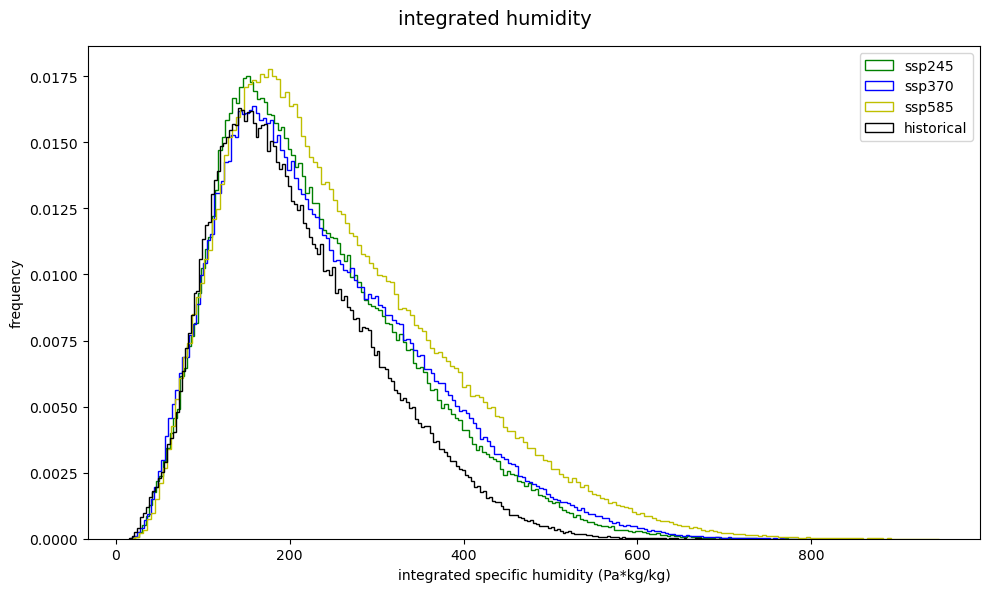

In [28]:
fig, axs = plt.subplots(figsize=(10,6))
fig.suptitle('integrated humidity', fontsize=14)

axs.hist(int_nh245, weights = np.zeros_like(int_nh245)+1./int_nh245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins= 200)
axs.hist(int_nh370, weights = np.zeros_like(int_nh370)+1./int_nh370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins= 200)
axs.hist(int_nh585, weights = np.zeros_like(int_nh585)+1./int_nh585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins= 200)
axs.hist(int_nhh, weights = np.zeros_like(int_nhh)+1./int_nhh.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins= 200)
axs.legend() 
axs.set( xlabel = 'integrated specific humidity (Pa*kg/kg)', ylabel = 'frequency')
plt.tight_layout()

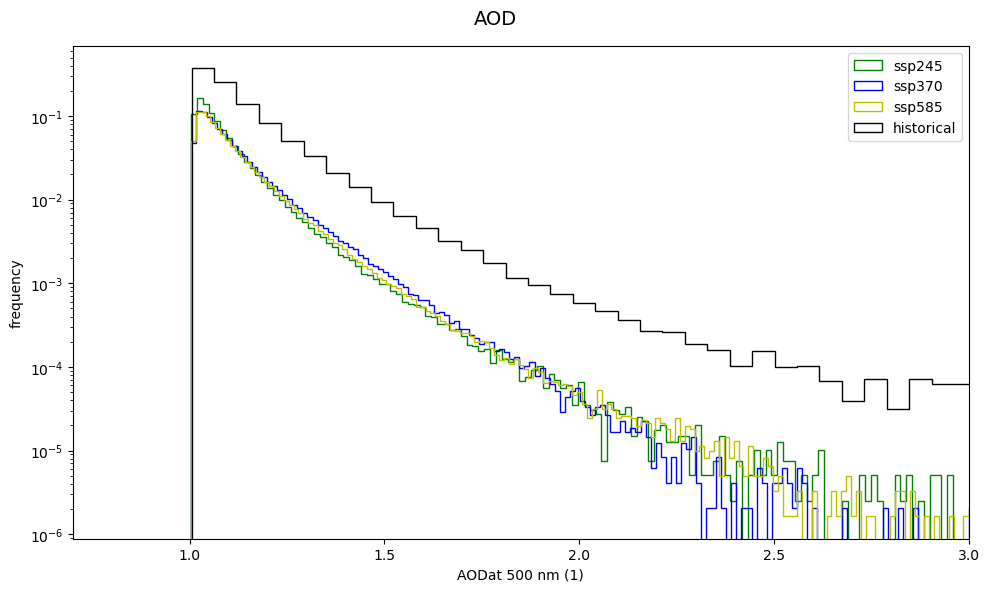

In [62]:
fig, axs = plt.subplots(figsize=(10,6))
fig.suptitle('AOD', fontsize=14)

axs.hist(na245, weights = np.zeros_like(na245)+1./na245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins= 200, )
axs.hist(na370, weights = np.zeros_like(na370)+1./na370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins= 200,)
axs.hist(na585, weights = np.zeros_like(na585)+1./na585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins= 200, )
axs.hist(nah, weights = np.zeros_like(nah)+1./nah.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins= 200, )
axs.legend() 
axs.set(xlim = (0.7,3), yscale = 'log', xlabel = 'AODat 500 nm (1)', ylabel = 'frequency')
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(figsize=(10,6))
fig.suptitle('Precipitation', fontsize=14)

axs.hist(np245, weights = np.zeros_like(np245)+1./np245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins = 70)
axs.hist(np370, weights = np.zeros_like(np370)+1./np370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins = 70)
axs.hist(np585, weights = np.zeros_like(np585)+1./np585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins = 70)
axs.hist(nph, weights = np.zeros_like(nph)+1./nph.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins = 70)
axs.legend() 
axs.set(yscale = 'log', xlabel = 'Precipitation in mm/s', ylabel = 'frequency')
plt.tight_layout()

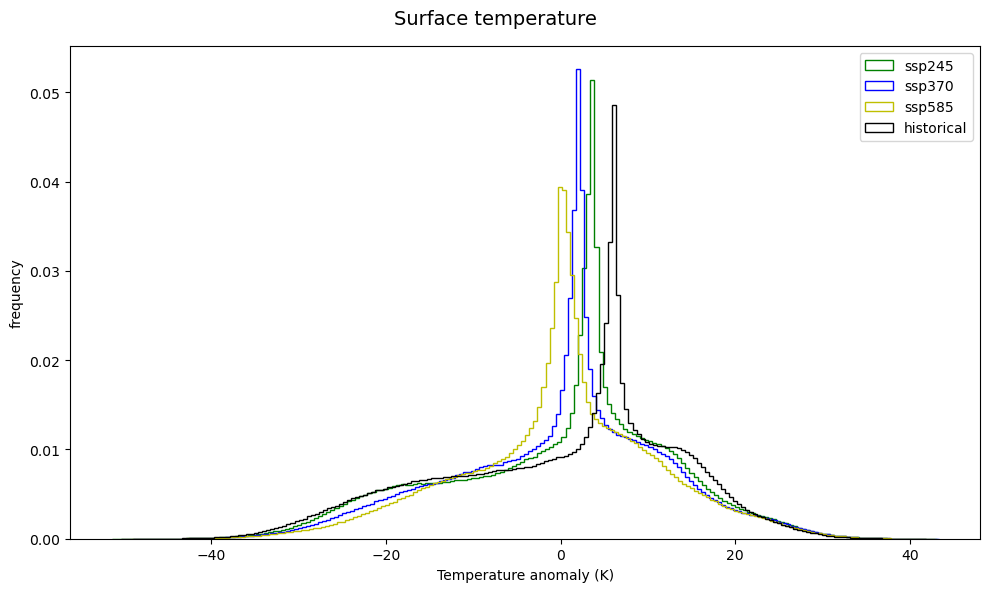

In [91]:
fig, axs = plt.subplots(figsize=(10,6))
fig.suptitle('Surface temperature', fontsize=14)

axs.hist(nt245, weights = np.zeros_like(nt245)+1./nt245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins = 200)
axs.hist(nt370, weights = np.zeros_like(nt370)+1./nt370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins = 200)
axs.hist(nt585, weights = np.zeros_like(nt585)+1./nt585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins = 200)
axs.hist(nth, weights = np.zeros_like(nth)+1./nth.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins = 200)
axs.legend() 
axs.set(xlabel = 'Temperature anomaly (K)', ylabel = 'frequency')
plt.tight_layout()

In [ ]:
'''fig, axs = plt.subplots(figsize=(10,6))
fig.suptitle('integrated humidity', fontsize=16)

axs.hist(int_nh245, weights = np.zeros_like(int_nh245)+1./int_nh245.size, 
       alpha = 0.5, color = "g", label = "ssp245", bins=np.logspace(np.log10(int_nh245.min()),np.log10(int_nh245.max()),30))
axs.hist(int_nh370, weights = np.zeros_like(int_nh370)+1./int_nh370.size, 
       alpha = 0.3, color = "b", label = "ssp370", bins=np.logspace(np.log10(int_nh370.min()),np.log10(int_nh370.max()),30))
axs.hist(int_nh585, weights = np.zeros_like(int_nh585)+1./int_nh585.size, 
          alpha = 0.5, color = "y", label = "ssp585", bins=np.logspace(np.log10(int_nh585.min()),np.log10(int_nh585.max()),30))
axs.hist(int_nhh, weights = np.zeros_like(int_nhh)+1./int_nhh.size, 
       alpha = 0.2, color = "k", label = "historical", bins=np.logspace(np.log10(int_nhh.min()),np.log10(int_nhh.max()),30))
axs.legend() 
axs.set(xscale = 'log',  xlabel = 'integrated specific humidity (Pa*kg/kg)', ylabel = 'frequency')'''

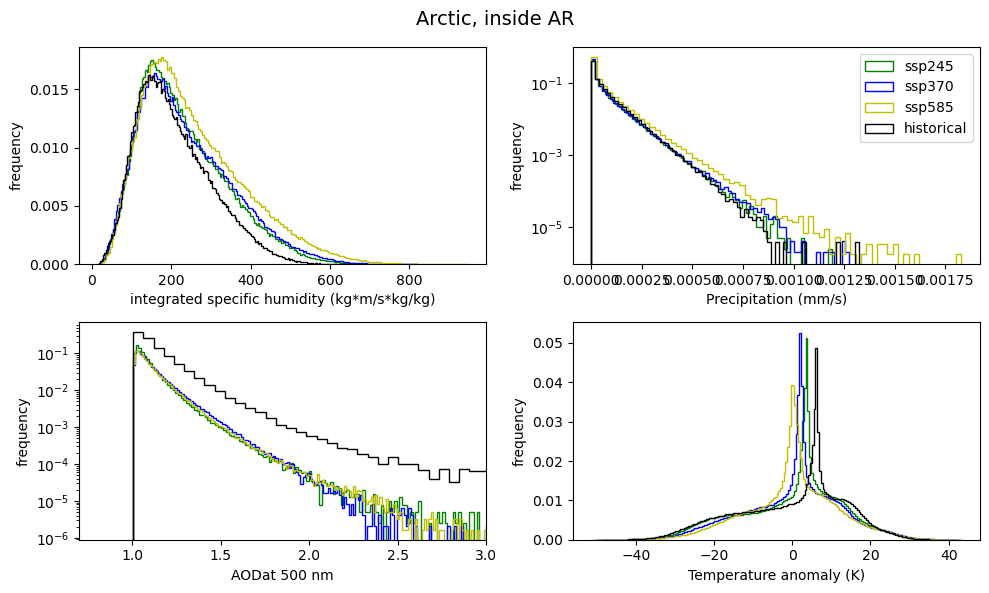

In [206]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.suptitle('Arctic, inside AR', fontsize=14)
axs = axs.flatten()
axs[0].hist(int_nh245, weights = np.zeros_like(int_nh245)+1./int_nh245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins= 200)
axs[0].hist(int_nh370, weights = np.zeros_like(int_nh370)+1./int_nh370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins= 200)
axs[0].hist(int_nh585, weights = np.zeros_like(int_nh585)+1./int_nh585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins= 200)
axs[0].hist(int_nhh, weights = np.zeros_like(int_nhh)+1./int_nhh.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins= 200)
axs[0].set( xlabel = 'integrated specific humidity (kg*m/s*kg/kg)', ylabel = 'frequency')

axs[1].hist(np245, weights = np.zeros_like(np245)+1./np245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins = 70)
axs[1].hist(np370, weights = np.zeros_like(np370)+1./np370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins = 70)
axs[1].hist(np585, weights = np.zeros_like(np585)+1./np585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins = 70)
axs[1].hist(nph, weights = np.zeros_like(nph)+1./nph.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins = 70) 
axs[1].set(yscale ='log', xlabel = 'Precipitation (mm/s)', ylabel = 'frequency')
axs[1].legend() 

axs[2].hist(na245, weights = np.zeros_like(na245)+1./na245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins= 200, )
axs[2].hist(na370, weights = np.zeros_like(na370)+1./na370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins= 200,)
axs[2].hist(na585, weights = np.zeros_like(na585)+1./na585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins= 200, )
axs[2].hist(nah, weights = np.zeros_like(nah)+1./nah.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins= 200, )
axs[2].set(yscale = 'log', xlim = (0.7,3), xlabel = 'AODat 500 nm', ylabel = 'frequency')

axs[3].hist(nt245, weights = np.zeros_like(nt245)+1./nt245.size, 
        fill = False, edgecolor='g', histtype = 'step', linewidth = 1, label = "ssp245", bins = 200)
axs[3].hist(nt370, weights = np.zeros_like(nt370)+1./nt370.size, 
        fill = False, edgecolor='b', histtype = 'step', linewidth = 1, label = "ssp370", bins = 200)
axs[3].hist(nt585, weights = np.zeros_like(nt585)+1./nt585.size, 
        fill = False, edgecolor='y',  histtype = 'step', linewidth = 1,label = "ssp585", bins = 200)
axs[3].hist(nth, weights = np.zeros_like(nth)+1./nth.size, 
        fill = False, edgecolor='k', histtype = 'step', linewidth = 1, label = "historical", bins = 200)
axs[3].set(xlabel = 'Temperature anomaly (K)', ylabel = 'frequency')
plt.tight_layout()

In [ ]:
'''# for frequency plots slice for plev >25000 and integrate over plev
mpl =marc.sel(plev=slice(100000, 25000))
pl =amarc.sel(plev=slice(100000, 25000)).where(arc['va'] > 0)

# wind
mplva =-1*mpl['va'].integrate('plev')
plva =-1*pl['va'].integrate('plev')

# humidity
mplh =-1*mpl['hus'].integrate('plev')
plh =-1*pl['hus'].integrate('plev')

mv = mplva.values.flatten()
mv = mv[~np.isnan(mv)]
v = plva.values.flatten()
v= v[~np.isnan(v)]
mh = mplh.values.flatten()
mh = mh[~np.isnan(mh)]
h = plh.values.flatten()
h = h[~np.isnan(h)]
mcc = pl['clt'].values.flatten()
mcc = mcc[~np.isnan(mcc)]
cc = mpl['clt'].values.flatten()
cc = cc[~np.isnan(cc)]
mt = mpl['tas'].values.flatten()
mt = mt[~np.isnan(mt)]
t = pl['tas'].values.flatten()
t = t[~np.isnan(t)]
ma = mpl['od550aer'].values.flatten()
ma = ma[~np.isnan(ma)]
a = pl['od550aer'].values.flatten()
a = a[~np.isnan(a)]
mp = mpl['pr'].values.flatten()
mp = mp[~np.isnan(mp)]
mp = mp[mp>0.0000024099]
p = pl['pr'].values.flatten()
p = p[~np.isnan(p)]
p = p[p>0.0000024099] # threshold for averaged precipitation in the sahara in the same unit'''

In [214]:
d

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

AttributeError: 'DataArrayGroupBy' object has no attribute 'plot'

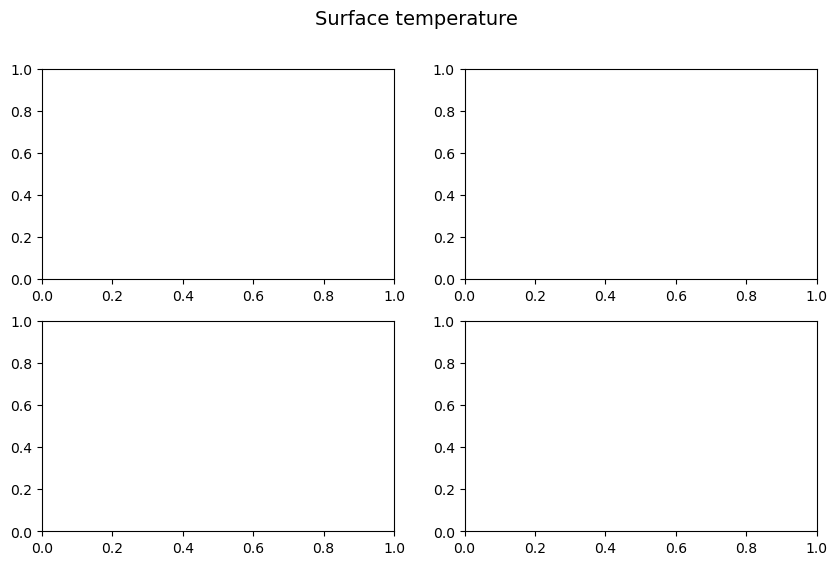

In [213]:
a = n245['tas'].groupby('time.season')
b = n370['tas'].groupby('time.season')
c = n585['tas'].groupby('time.season')
d = nh['tas'].groupby('time.season')


fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.suptitle('Surface temperature', fontsize=14)
axs = axs.flatten()

a.plot.hist(ax = axs[0],  
        fill = False, histtype = 'step', linewidth = 1, label = "ssp245", bins = 200)
b.plot.hist(ax =axs[1], 
        fill = False, histtype = 'step', linewidth = 1, label = "ssp370", bins = 200)
c.plot.hist(ax =axs[2],  
        fill = False,  histtype = 'step', linewidth = 1,label = "ssp585", bins = 200)
d.plot.hist(ax =axs[3],  
        fill = False, histtype = 'step', linewidth = 1, label = "historical", bins = 200)
axs.set(xlabel = 'Temperature (K)', ylabel = 'frequency')
axs.legend() 
plt.tight_layout()